# Linear Regression Model

## importing essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sanjeev\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("advertising.csv")
print(df.to_string())

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
5      8.7   48.9       75.0    7.2
6     57.5   32.8       23.5   11.8
7    120.2   19.6       11.6   13.2
8      8.6    2.1        1.0    4.8
9    199.8    2.6       21.2   15.6
10    66.1    5.8       24.2   12.6
11   214.7   24.0        4.0   17.4
12    23.8   35.1       65.9    9.2
13    97.5    7.6        7.2   13.7
14   204.1   32.9       46.0   19.0
15   195.4   47.7       52.9   22.4
16    67.8   36.6      114.0   12.5
17   281.4   39.6       55.8   24.4
18    69.2   20.5       18.3   11.3
19   147.3   23.9       19.1   14.6
20   218.4   27.7       53.4   18.0
21   237.4    5.1       23.5   17.5
22    13.2   15.9       49.6    5.6
23   228.3   16.9       26.2   20.5
24    62.3   12.6       18.3    9.7
25   262.9    3.5       19.5   17.0
26   142.9   29.3       12.6

## EDA

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df.shape

(200, 4)

In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [12]:
X = df.iloc[:,:-1]
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [13]:
y = df.iloc[:,-1]
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


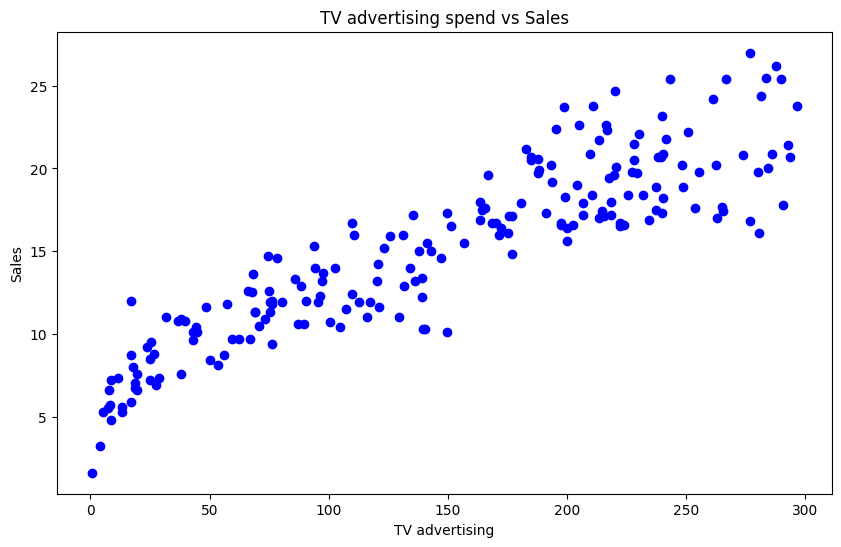

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(x=df["TV"],y=df["Sales"],color="blue")
plt.title("TV advertising spend vs Sales")
plt.xlabel("TV advertising")
plt.ylabel("Sales")
plt.show()

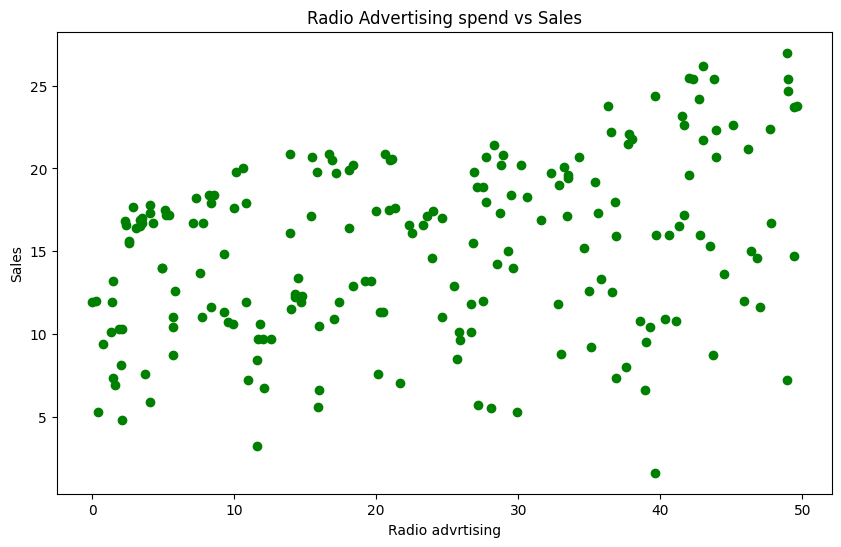

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x=df["Radio"],y=df["Sales"],color="green")
plt.title("Radio Advertising spend vs Sales")
plt.xlabel("Radio advrtising")
plt.ylabel("Sales")
plt.show()

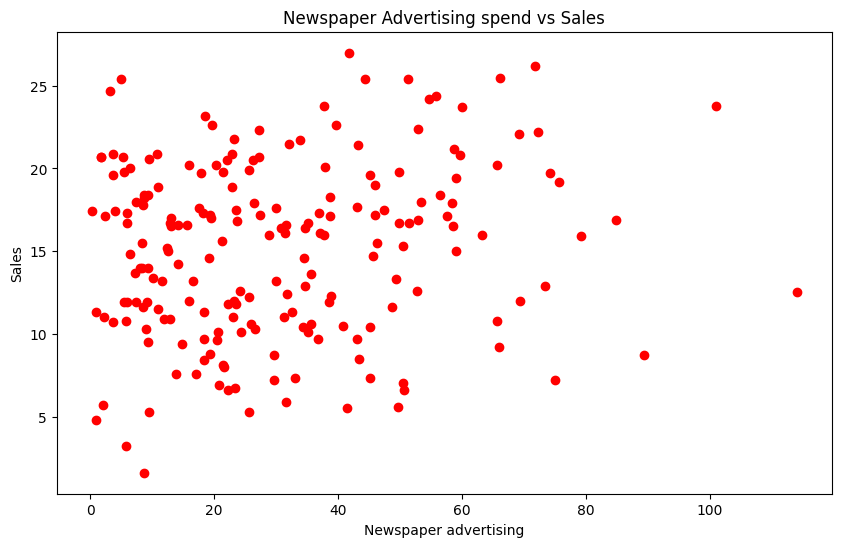

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x=df["Newspaper"],y=df["Sales"],color="red")
plt.title("Newspaper Advertising spend vs Sales")
plt.xlabel("Newspaper advertising")
plt.ylabel("Sales")
plt.show()

## Model Training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 20)

In [18]:
print(X_train)

        TV  Radio  Newspaper
152  197.6   23.3       14.2
67   139.3   14.5       10.2
133  219.8   33.5       45.1
59   210.7   29.5        9.3
63   102.7   29.6        8.4
..     ...    ...        ...
148   38.0   40.3       11.9
137  273.7   28.9       59.7
156   93.9   43.5       50.5
15   195.4   47.7       52.9
99   135.2   41.7       45.9

[160 rows x 3 columns]


In [19]:
print(X_test)

        TV  Radio  Newspaper
150  280.7   13.9       37.0
28   248.8   27.1       22.9
13    97.5    7.6        7.2
178  276.7    2.3       23.7
109  255.4   26.9        5.5
168  215.4   23.6       57.6
177  170.2    7.8       35.2
196   94.2    4.9        8.1
47   239.9   41.5       18.5
195   38.2    3.7       13.8
136   25.6   39.0        9.3
77   120.5   28.5       14.2
187  191.1   28.7       18.2
166   17.9   37.6       21.6
84   213.5   43.0       33.8
175  276.9   48.9       41.8
155    4.1   11.6        5.7
167  206.8    5.2       19.4
121   18.8   21.7       50.4
192   17.2    4.1       31.6
176  248.4   30.2       20.3
113  209.6   20.6       10.7
89   109.8   47.8       51.4
147  243.2   49.0       44.3
185  205.0   45.1       19.6
143  104.6    5.7       34.4
199  232.1    8.6        8.7
126    7.8   38.9       50.6
5      8.7   48.9       75.0
97   184.9   21.0       22.0
34    95.7    1.4        7.4
139  184.9   43.9        1.7
44    25.1   25.7       43.3
72    26.8   3

In [20]:
print(y_train)

152    16.6
67     13.4
133    19.6
59     18.4
63     14.0
       ... 
148    10.9
137    20.8
156    15.3
15     22.4
99     17.2
Name: Sales, Length: 160, dtype: float64


In [21]:
print(y_test)

150    16.1
28     18.9
13     13.7
178    16.8
109    19.8
168    17.1
177    16.7
196    14.0
47     23.2
195     7.6
136     9.5
77     14.2
187    17.3
166     8.0
84     21.7
175    27.0
155     3.2
167    17.2
121     7.0
192     5.9
176    20.2
113    20.9
89     16.7
147    25.4
185    22.6
143    10.4
199    18.4
126     6.6
5       7.2
97     20.5
34     11.9
139    20.7
44      8.5
72      8.8
183    26.2
85     20.2
149    10.1
46     10.6
86     12.0
112    17.1
Name: Sales, dtype: float64


In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)
print(y_pred)

[21.2848138  20.91043783 10.69509996 19.7913078  21.16845912 18.90232327
 14.72365132 10.23773588 21.93399674  7.14013076 10.16898487 14.15866575
 17.97295152  9.66176635 20.74507312 24.79222836  6.11475457 16.34004211
  8.15579489  6.13467773 21.20485236 18.0765751  15.779286   23.01086671
 20.45153144 10.99006528 18.00630747  9.38179148 10.58793644 16.84560949
  9.94596581 19.17387971  8.8843535   9.64302649 24.86989537 17.20103929
  9.84682929 10.64145876 11.69673326 15.67982848]


In [24]:
df["Predicted_sales"] = lr.predict(X)

## appending new column to dataset

In [25]:
print(df.to_string())

        TV  Radio  Newspaper  Sales  Predicted_sales
0    230.1   37.8       69.2   22.1        21.235058
1     44.5   39.3       45.1   10.4        11.363591
2     17.2   45.9       69.3   12.0        10.702058
3    151.5   41.3       58.5   16.5        17.354530
4    180.8   10.8       58.4   17.9        15.705471
5      8.7   48.9       75.0    7.2        10.587936
6     57.5   32.8       23.5   11.8        11.281841
7    120.2   19.6       11.6   13.2        13.193191
8      8.6    2.1        1.0    4.8         5.333837
9    199.8    2.6       21.2   15.6        15.699141
10    66.1    5.8       24.2   12.6         8.898020
11   214.7   24.0        4.0   17.4        18.679386
12    23.8   35.1       65.9    9.2         9.901919
13    97.5    7.6        7.2   13.7        10.695100
14   204.1   32.9       46.0   19.0        19.229204
15   195.4   47.7       52.9   22.4        20.353632
16    67.8   36.6      114.0   12.5        12.617827
17   281.4   39.6       55.8   24.4        24.

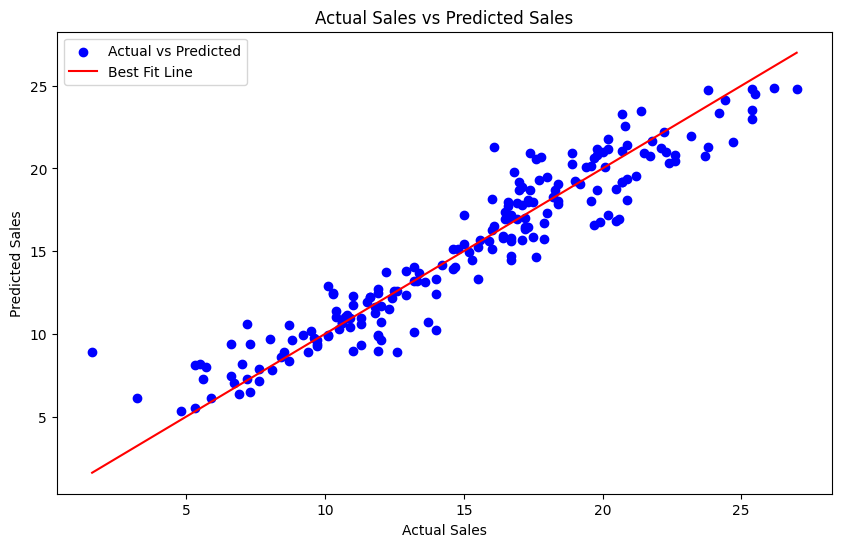

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Sales'], df['Predicted_sales'], color='blue', label='Actual vs Predicted')
plt.plot([df['Sales'].min(), df['Sales'].max()], [df['Sales'].min(), df['Sales'].max()], color='red', label='Best Fit Line')
plt.title('Actual Sales vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

## Evaluating the model

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test,y_pred)
print("The mean squared error is ",mse)
r2 = r2_score(y_test,y_pred)
print("The r2 score is ",r2)


The mean squared error is  4.178598801682464
The r2 score is  0.8881441362855258
